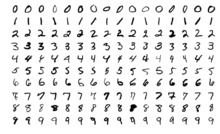

In [1]:
from IPython.display import Image
Image('handwritten.png',width=600, height=300)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical

2022-02-13 22:56:43.759090: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-13 22:56:43.759124: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [5]:
print(f'Dim de X_train = {X_train.shape}')
print(f'Dim de y_train = {y_train.shape}')
print(f'Dim de X_test = {X_test.shape}')
print(f'Dim de y_test = {y_test.shape}')

Dim de X_train = (60000, 28, 28)
Dim de y_train = (60000,)
Dim de X_test = (10000, 28, 28)
Dim de y_test = (10000,)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

In [8]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


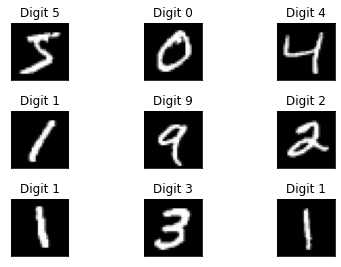

In [9]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(f'Digit {y_train[i]}')
    plt.xticks([])
    plt.yticks([])

Text(0.5, 1.0, 'Distribution des valeurs des pixels')

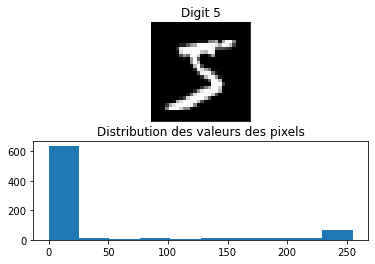

In [10]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap = 'gray')
plt.title(f'Digit {y_train[0]}')
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title('Distribution des valeurs des pixels')

In [11]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

**Normalisation**

In [12]:
X_train /= 255
X_test /= 255

In [13]:
nb_classes = 10
print(f'Dim avant one-hot-encoder {y_train.shape}')

Dim avant one-hot-encoder (60000,)


5 -> [0,0,0,0,0,1,0,0,0,0] : to_categorical()

In [14]:
Y_train = to_categorical(y_train,nb_classes)
print(f'Dim après one-hot-encoder {Y_train.shape}')

Dim après one-hot-encoder (60000, 10)


In [15]:
y_train[0]

5

In [16]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Modélisation**

In [17]:
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

2022-02-13 22:32:13.441369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-13 22:32:13.441982: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-13 22:32:13.442121: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-02-13 22:32:13.442269: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-02-13 22:32:13.442489: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [19]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [20]:
Y_test = to_categorical(y_test,nb_classes)

In [21]:
history = model.fit(X_train,Y_train,
         batch_size = 128,
         epochs = 20,
         verbose = 2,
         validation_data = (X_test,Y_test)) 

Epoch 1/20
469/469 - 4s - loss: 0.2471 - accuracy: 0.9263 - val_loss: 0.1053 - val_accuracy: 0.9677 - 4s/epoch - 9ms/step
Epoch 2/20
469/469 - 4s - loss: 0.1009 - accuracy: 0.9690 - val_loss: 0.0791 - val_accuracy: 0.9747 - 4s/epoch - 8ms/step
Epoch 3/20
469/469 - 4s - loss: 0.0718 - accuracy: 0.9769 - val_loss: 0.0751 - val_accuracy: 0.9765 - 4s/epoch - 8ms/step
Epoch 4/20
469/469 - 4s - loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.0618 - val_accuracy: 0.9807 - 4s/epoch - 8ms/step
Epoch 5/20
469/469 - 4s - loss: 0.0441 - accuracy: 0.9855 - val_loss: 0.0687 - val_accuracy: 0.9801 - 4s/epoch - 8ms/step
Epoch 6/20
469/469 - 4s - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0638 - val_accuracy: 0.9812 - 4s/epoch - 8ms/step
Epoch 7/20
469/469 - 4s - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.0673 - val_accuracy: 0.9807 - 4s/epoch - 8ms/step
Epoch 8/20
469/469 - 4s - loss: 0.0328 - accuracy: 0.9886 - val_loss: 0.0725 - val_accuracy: 0.9787 - 4s/epoch - 8ms/step
Epoch 9/20
469/469 - 4s 

**Enregistrement du modèle**

In [25]:
import os
save_dir = '/home/bassem/Documents/DL_CDOSS_2nditer/1_ANN_HandwrittenMNIST'

In [26]:
model_name = 'keras_MNIST.h5'
model_path = os.path.join(save_dir, model_name)

In [27]:
model.save(model_path)

In [28]:
print('Modèle enregistré dans %s' % model_path)

Modèle enregistré dans /home/bassem/Documents/DL_CDOSS_2nditer/1_ANN_HandwrittenMNIST/keras_MNIST.h5


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

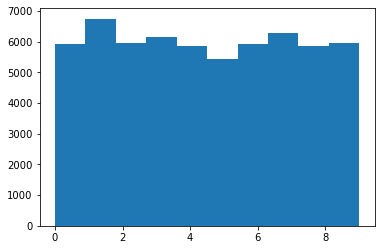

In [29]:
plt.hist(y_train)

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

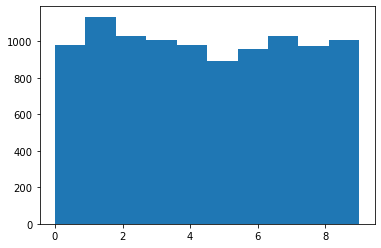

In [30]:
plt.hist(y_test)

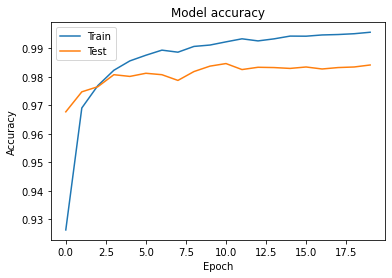

In [31]:
# Visualiser les métriques
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])

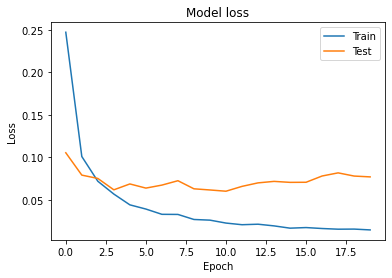

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])

In [33]:
# Evaluation des performances du modèle
mnist_model = load_model('keras_MNIST.h5')

In [34]:
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - loss: 0.0770 - accuracy: 0.9841 - 1s/epoch - 5ms/step


In [35]:
print(f'Loss test {round(loss_and_metrics[0],4)}')
print(f'Accuracy test {round(loss_and_metrics[1],4)}')

Loss test 0.077
Accuracy test 0.9841


In [36]:
predict_X = mnist_model.predict(X_test)

In [37]:
predicted_classes = np.argmax(predict_X, axis=1)

In [38]:
for i in range(10):
    print([y_test[i],predicted_classes[i]])

[7, 7]
[2, 2]
[1, 1]
[0, 0]
[4, 4]
[1, 1]
[4, 4]
[9, 9]
[5, 5]
[9, 9]


In [39]:
np.nonzero(predicted_classes!=y_test)

(array([ 115,  247,  326,  340,  381,  445,  447,  582,  646,  684,  691,
         707,  717,  720,  760,  844,  947,  951, 1014, 1039, 1112, 1156,
        1178, 1224, 1226, 1232, 1242, 1247, 1260, 1319, 1328, 1393, 1522,
        1530, 1549, 1609, 1621, 1681, 1754, 1790, 1878, 1901, 1941, 1982,
        1987, 2024, 2053, 2070, 2098, 2109, 2130, 2135, 2182, 2293, 2308,
        2339, 2387, 2408, 2433, 2462, 2488, 2582, 2597, 2607, 2648, 2654,
        2770, 2810, 2921, 2927, 2939, 2953, 3073, 3117, 3172, 3250, 3441,
        3475, 3503, 3520, 3558, 3559, 3767, 3776, 3808, 3818, 3943, 3985,
        4065, 4075, 4163, 4176, 4199, 4248, 4271, 4289, 4306, 4425, 4433,
        4437, 4443, 4497, 4536, 4671, 4740, 4761, 4807, 4814, 4823, 4860,
        4879, 4880, 5078, 5331, 5634, 5642, 5676, 5734, 5936, 5937, 5955,
        5972, 5973, 6009, 6011, 6056, 6166, 6555, 6574, 6576, 6597, 6651,
        6783, 7216, 7338, 7434, 8059, 8246, 8277, 8311, 8325, 8522, 8527,
        9009, 9015, 9024, 9280, 9587, 

In [40]:
[y_test[115],predicted_classes[115]]

[4, 9]

In [41]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

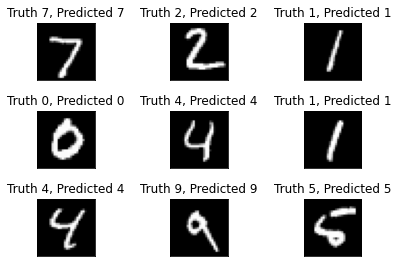

In [42]:
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray')
    plt.title(f'Truth {y_test[correct]}, Predicted {predicted_classes[correct]}')
    plt.xticks([])
    plt.yticks([])

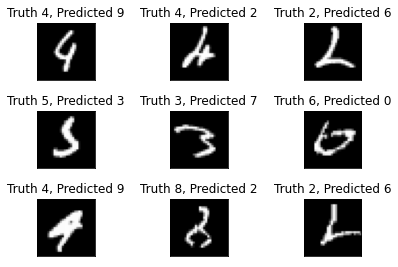

In [43]:
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[incorrect].reshape(28,28), cmap = 'gray')
    plt.title(f'Truth {y_test[incorrect]}, Predicted {predicted_classes[incorrect]}')
    plt.xticks([])
    plt.yticks([])